In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_iris

In [21]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [22]:
# Convert target to a categorical column for easy analysis

target_column = 'species'
y = y.replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [23]:
# Combine features and target
df = X.copy()
df[target_column] = y

In [24]:
print(df.info())
print(df.describe())
print(df[target_column].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

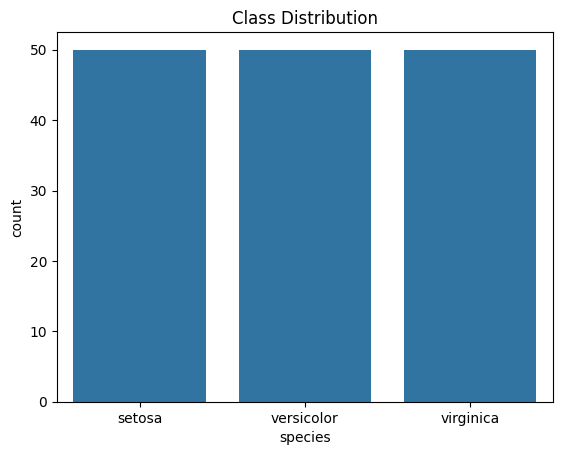

In [25]:
sns.countplot(x=target_column, data=df)
plt.title("Class Distribution")
plt.show()


In [26]:
df_undersampled = df[df[target_column] != 'setosa']
X_undersampled = df_undersampled.drop(columns=[target_column])
y_undersampled = df_undersampled[target_column]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=30, stratify=y_undersampled)


In [28]:
# Undersample the majority class
majority_class = df_undersampled[df_undersampled[target_column] == 'versicolor']
minority_class = df_undersampled[df_undersampled[target_column] == 'virginica']

majority_class_undersampled = resample(majority_class,
                                       replace=False,
                                       n_samples=len(minority_class),
                                       random_state=30)

df_undersampled = pd.concat([majority_class_undersampled, minority_class])

X_train_undersampled = df_undersampled.drop(columns=[target_column])
y_train_undersampled = df_undersampled[target_column]

In [29]:
# Oversample minority class
majority_class = df_undersampled[df_undersampled[target_column] == 'versicolor']
minority_class = df_undersampled[df_undersampled[target_column] == 'virginica']

minority_class_oversampled = resample(minority_class,
                                      replace=True,
                                      n_samples=len(majority_class),
                                      random_state=30)

df_oversampled = pd.concat([majority_class, minority_class_oversampled])

X_train_oversampled = df_oversampled.drop(columns=[target_column])
y_train_oversampled = df_oversampled[target_column]

In [30]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=30)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [31]:
rf = RandomForestClassifier(random_state=30)

In [32]:
# Train and evaluate model with undersampled data

rf.fit(X_train_undersampled, y_train_undersampled)
y_pred = rf.predict(X_test)
print("Classification Report (Undersampling):\n", classification_report(y_test, y_pred))

Classification Report (Undersampling):
               precision    recall  f1-score   support

  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



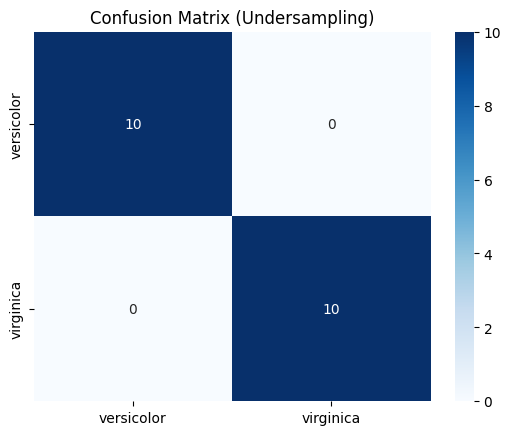

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["versicolor", "virginica"], yticklabels=["versicolor", "virginica"])
plt.title("Confusion Matrix (Undersampling)")
plt.show()

Classification Report (Oversampling):
               precision    recall  f1-score   support

  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



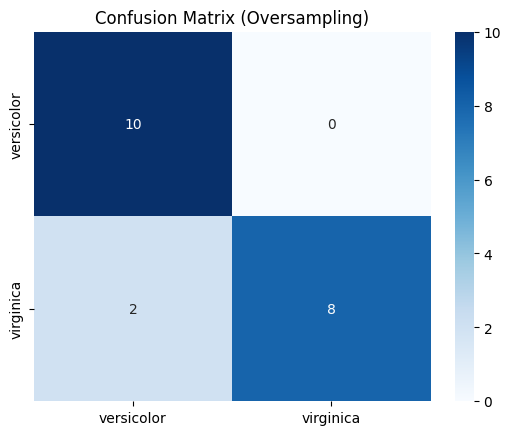

In [34]:
# Train and evaluate model with oversampled data
rf.fit(X_train_oversampled, y_train_oversampled)
y_pred = rf.predict(X_test)
print("Classification Report (Oversampling):\n", classification_report(y_test, y_pred))

# Confusion matrix for oversampled data
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["versicolor", "virginica"], yticklabels=["versicolor", "virginica"])
plt.title("Confusion Matrix (Oversampling)")
plt.show()

Classification Report (SMOTE):
               precision    recall  f1-score   support

  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



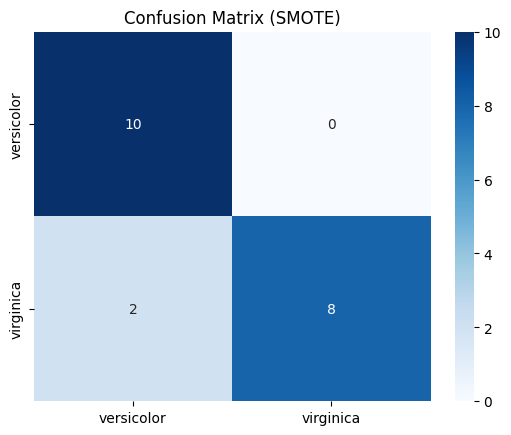

In [35]:
# Train and evaluate model with SMOTE data
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test)
print("Classification Report (SMOTE):\n", classification_report(y_test, y_pred))

# Confusion matrix for SMOTE data
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["versicolor", "virginica"], yticklabels=["versicolor", "virginica"])
plt.title("Confusion Matrix (SMOTE)")
plt.show()